In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np

In [29]:
import pandas as pd 
df=pd.read_csv("TSLA.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,6/29/2010,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,6/30/2010,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,7/1/2010,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,7/2/2010,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,7/6/2010,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [30]:
df.Close

0        23.889999
1        23.830000
2        21.959999
3        19.200001
4        16.110001
           ...    
2411    566.900024
2412    580.989990
2413    640.809998
2414    650.570007
2415    780.000000
Name: Close, Length: 2416, dtype: float64

In [31]:
x=df.drop(["Close","Date","Adj Close"],axis="columns")
y=df["Close"]

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [33]:
reg=LinearRegression()
reg.fit(x_train,y_train)
reg.coef_

array([-6.33406470e-01,  9.09822286e-01,  7.22221223e-01, -2.55626653e-08])

In [34]:
reg.intercept_

-0.03570889152700829

In [35]:
y_test

966     207.729996
557      28.280001
148      24.010000
1917    315.230011
1585    200.240005
           ...    
1599    188.020004
1797    351.920013
386      27.250000
1622    185.850006
459      31.820000
Name: Close, Length: 484, dtype: float64

In [36]:
predicted=reg.predict(x_test)
predicted

array([211.93327382,  28.34344645,  23.96747049, 326.63889044,
       197.99951124, 209.84143145,  26.57054023,  24.1159654 ,
       218.55046473, 350.59944847, 216.7099975 , 280.40049957,
        31.69697966, 102.55542126,  20.40022644, 349.79891149,
       103.437858  , 258.02993844,  27.72811815, 223.91076239,
       363.87876094, 325.90560672, 221.70942778, 341.85450842,
       306.21971732, 180.68302959, 336.4653148 , 271.66139389,
       226.68781494, 244.90669049,  26.54390033,  31.41751114,
        30.63028454, 227.98926241, 392.95272138, 222.78373695,
       214.47184339, 137.93700922, 325.22897451, 219.93566688,
       309.22196141,  36.64959179,  23.07174593, 214.02967116,
        28.19760332, 231.64875996, 197.4321599 ,  34.04842541,
       308.29253631, 272.83813857, 231.79550035, 298.31285403,
        35.44684051, 217.34268703, 289.79617795, 232.2691816 ,
        34.16691676, 237.48107308,  18.0454679 ,  52.30063598,
       227.67194808,  34.09896992, 260.47309803, 323.43

In [37]:
dframe=pd.DataFrame({"Actual":y_test.values.flatten(),"Predicted":predicted.flatten()})
dframe.head(25)

,Actual,Predicted
0,207.729996,211.933274
1,28.280001,28.343446
2,24.010000,23.967470
3,315.230011,326.638890
4,200.240005,197.999511
5,210.240005,209.841431
6,26.440001,26.570540
7,22.790001,24.115965
8,224.839996,218.550465
9,353.179993,350.599448


In [38]:
reg.score(x_test,y_test)

0.9996956321110008

In [40]:
print("mean absolute error is:",metrics.mean_absolute_error(y_test,predicted))
print("mean squared error is:",metrics.mean_squared_error(y_test,predicted))
print("root mean squared error is:",np.sqrt(metrics.mean_squared_error(y_test,predicted)))


mean absolute error is: 1.4055113679002122
mean squared error is: 4.2569361576814
root mean squared error is: 2.0632343923271055


<AxesSubplot:>

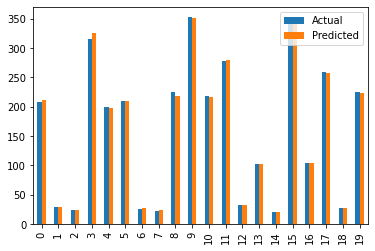

In [42]:
graph=dframe.head(20)
graph.plot(kind="bar")